## iteration

<IPython.core.display.Javascript object>


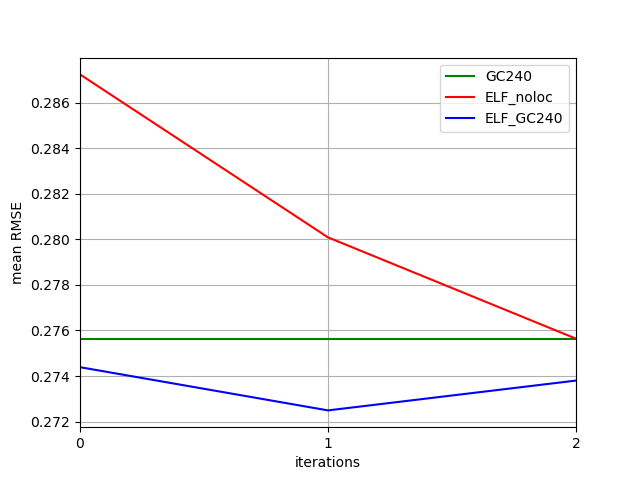

In [1]:
%matplotlib notebook
from os.path import dirname, join as pjoin
import sys
# sys.path.append('/Users/ree/Documents/DataAssimilization/AI_localization/L05/git_repo/general')
sys.path.append('/home/lllei/AI_localization/L05/git_repo/general')
from construct_GC_2d import construct_GC_2d
import numpy as np
import matplotlib.pyplot as plt

iobg = 40
datadir = './'
gc_a = np.load(pjoin(datadir,'iter0_gc/iter0/analy_rmse_gc240.npy'))
gc_p = np.load(pjoin(datadir,'iter0_gc/iter0/prior_rmse_gc240.npy'))
gc_pm = np.mean(gc_p[iobg:])

ibg = 0
iend = 2
iters = range(ibg,iend+1)
elf_pms_gc = []
elf_pms_noloc = []
for it in iters:
    datadir = './iter0_gc/'
    elf_p = np.load(pjoin(datadir,'iter{0:d}/prior_rmse_elf.npy'.format(it)))
    elf_pm = np.mean(elf_p[iobg:])
    elf_pms_gc.append(elf_pm)
    datadir = './iter0_noloc/'
    elf_p = np.load(pjoin(datadir,'iter{0:d}/prior_rmse_elf.npy'.format(it)))
    elf_pm = np.mean(elf_p[iobg:])
    elf_pms_noloc.append(elf_pm)

x = iend + 1
gc_pms = np.tile(gc_pm, x)
plt.plot(range(x),gc_pms,'g',label='GC240')
plt.plot(range(x),elf_pms_noloc,'r',label='ELF_noloc')
plt.plot(range(x),elf_pms_gc,'b',label='ELF_GC240')
plt.xlabel('iterations')
plt.ylabel('mean RMSE')
plt.xticks(range(x))
plt.xlim(0,x-1)
# plt.ylim(0.274,0.295)
# plt.title('ELF iterated from noloc')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('rmses_elf_iter.png')